# Data analysis project: Energy use in South America

We conduct this data analysis project with inspiration from the paper "Triangular Relationship between Energy Consumption, Price Index and National Income in Asian Countries: A Pooled Mean Group Approach in Presence of Structural Breaks" by Mehmood, Raza, Rana, Sohaib and Khan. 

It is a well known fact that energy consumption is a key factor in economic activity. The article mentioned above is the staring point for this project. We apply simple descriptive economic skills to investigate the relationship between energy use and GDP per capita. We apply the analysis for countries of SOuth America instead of Asian countries. 

# Importing packages

We import wb from pandas_datareader so we can extract data directly from the World Bank. 

In [46]:
#Install packages usefull for this workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from pandas_datareader import wb

# Read and clean data

## Select countries and indicators

We select the 12 countries of South America. For the analysis we use the indicators energy use per capita in kilogram of oil equivalents and GDP per capita in 2010 USD. The starting year of the data is 1971 and goes to 2014. The data is downloaded from the World Bank Development Indicators.

In [138]:
# a: Select countries

In [2]:
countries = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'VEN', 'URY', 'SUR']

In [3]:
# b: Select indiacators: GDP per capita and Energy use

In [4]:
euse = wb.download(indicator='EG.USE.PCAP.KG.OE', country=countries, start=1971, end=2014)

In [5]:
print("This is what the first indicator looks like:")
euse.head(3)

This is what the first indicator looks like:


EG.USE.PCAP.KG.OE
country   year                   
Argentina 2014        2015.187040
          2013        1951.439454
          2012        1920.080959

In [6]:
gdp = wb.download(indicator='NY.GDP.PCAP.KD', country=countries, start=1971, end=2014)

In [7]:
print("This is what the second indicator looks like:")
gdp.head(3)

This is what the second indicator looks like:


NY.GDP.PCAP.KD
country   year                
Argentina 2014    10323.206940
          2013    10699.197716
          2012    10557.885389

Note:
For further analysis compare with the consumer price index

cpi = wb.download(indicator='FP.CPI.TOTL', country=countries, start=1971, end=2014)
cpi.head(3)

## Cleaning data

We have downloaded the two indicators separately so we want to merge the two datasets. Next, we sort it by countries and year to get the structure of the dataset as we want it. 

In [8]:
# a: Merging the two data sets retaining the indicators 
joiningdata = pd.merge(euse,gdp, how='inner', on=['country','year'])
joiningdata = joiningdata.reset_index()
joiningdata = joiningdata.rename(columns = {'country' : 'countries', 
                                            'EG.USE.PCAP.KG.OE' : 'euse', 
                                            'NY.GDP.PCAP.KD' : 'gdp'})

joiningdata['year'] = joiningdata.year.astype(float)

In [9]:
# b: Sorting data
joiningdata.sort_values(by=['countries','year'], inplace=True)
joiningdata = joiningdata.reset_index(drop = True)

The data now looks like this: 

In [10]:
# Printing the 20 first rows of the dataset
joiningdata.head(20)

,countries,year,euse,gdp
0,Argentina,1971.0,1380.921398,7335.759136
1,Argentina,1972.0,1379.818923,7329.921158
2,Argentina,1973.0,1411.496781,7407.366754
3,Argentina,1974.0,1415.682954,7685.857212
4,Argentina,1975.0,1378.546993,7559.143749
5,Argentina,1976.0,1404.744778,7291.840429
6,Argentina,1977.0,1420.567765,7681.017571
7,Argentina,1978.0,1426.919260,7227.564124
8,Argentina,1979.0,1484.565823,7849.363340
9,Argentina,1980.0,1487.617079,7849.115971


**Deleting rows with missing data**

The countries Guyana and Suriname is missing a lot of data and we therefore exclude them from our analysis.
We delete the rows with missing data by dropping the rows where the country name is Guyana or Suriname. We ensure that rows has been deleted by checking number of observations before and after.

In [11]:
print(f'before: {joiningdata.shape[0]} observations, {joiningdata.shape[1]} variables')
for val in ['Guyana', 'Suriname']: 
    I = joiningdata.countries.str.contains(val)
    joiningdata.drop(joiningdata[I].index, inplace=True)
print(f'after: {joiningdata.shape[0]} observations, {joiningdata.shape[1]} variables')

before: 528 observations, 4 variables
after: 440 observations, 4 variables




We want to take a look at the mean of the two indicators for each country. 

In [12]:
joiningdata.groupby('countries').mean()

,year,euse,gdp
countries,,,
Argentina,1992.5,1577.821307,8038.279267
Bolivia,1992.5,469.526977,1630.257096
Brazil,1992.5,1033.796172,8553.640898
Chile,1992.5,1277.436140,7934.020545
Colombia,1992.5,660.678585,4618.023011
Ecuador,1992.5,638.038425,3887.789092
Paraguay,1992.5,694.451297,3394.018057
Peru,1992.5,551.234617,3723.383196
Uruguay,1992.5,902.129600,8172.112245


The table above shows the mean of energy use and gdp for each country.
We note that Venezuela and Argentina are the countries with the highest mean of energy use. They have as well high mean of gdp along with Brazil and Chile. 

# Analysis
The data set is cleaned. We begin the analysis of investigating the relationship between economic growth and energy use.
First in section 4.1 we take a look at the growth in GDP per capita. We calculate the percentage change to see which country has the greatest economic development from 1971 to 2014. Next in section 4.2 we apply the same analysis with the indicator energy use to see the development in energy use throughout the years. We present the relevant results in tables and graphs.  

## Economic growth
### GDP per Capita

We calculate the percentage change in GDP for each country by: 

$ growth_ {GDP}= \frac{GDP_{2014} - GDP_{1971}}{GDP_{1971}} \bullet 100 \%$

We calculate the percentage change by creating two new columns containing respectively the first and the last value of gdp, i.e. the value of GDp in 1971 and 2014.

In [13]:
# Calculate percentage change in gdp
joiningdata['gdp_pct'] = joiningdata.groupby('countries')['gdp'].pct_change() *100

In [14]:
# Economic growth
# Creating a column containing the value of gdp for each country year 1971
joiningdata_2=joiningdata.copy()
joiningdata_grouped = joiningdata_2.groupby('countries')
joiningdata_grouped_first = joiningdata_grouped.gdp.first()
joiningdata_grouped_first.name = 'first'

# The column is added to joiningdata_2.
joiningdata_2.set_index(['countries','year'],inplace=True)
joiningdata_2 = joiningdata_2.join(joiningdata_grouped_first)
joiningdata_2.reset_index(inplace=True)

In [15]:
# Creating a column containing the value of gdp for each country year 2014
joiningdata_grouped_last = joiningdata_grouped.gdp.last()
joiningdata_grouped_last.name = 'last'

# The column is added to joiningdata_2.
joiningdata_2.set_index(['countries','year'],inplace=True)
joiningdata_2 = joiningdata_2.join(joiningdata_grouped_last)
joiningdata_2.reset_index(inplace=True)

# Calculating the economic growth for each country in the period 1971-2014
joiningdata_2['growth_gdp'] = (joiningdata_2['last']-joiningdata_2['first'])/joiningdata_2['first']*100

In [16]:
#Table showing the total gdp growth rate for each country
joiningdata_mean=joiningdata_2.groupby('countries').mean().copy()
joiningdata_mean.drop(['year', 'euse', 'gdp', 'gdp_pct', 'first', 'last'],axis=1,inplace=True)
joiningdata_mean

# Sorting data:
#Add names
joiningdata_mean.sort_values(by=['growth_gdp'], inplace=True)
joiningdata_mean = joiningdata_mean.reset_index()

The table below shows GDP growth rate for each country:

In [17]:
joiningdata_mean

,countries,growth_gdp
0,"Venezuela, RB",-2.876523
1,Argentina,40.724453
2,Bolivia,61.693689
3,Peru,69.172403
4,Ecuador,111.370857
5,Brazil,132.877773
6,Uruguay,145.714679
7,Colombia,152.604067
8,Paraguay,175.215844
9,Chile,193.591635


As can be seen Chile, Paraguay, Columbia, Uruguay and Brazil have the highest growth in gdp over the 44 years.
The five countries are represented in the graph below.

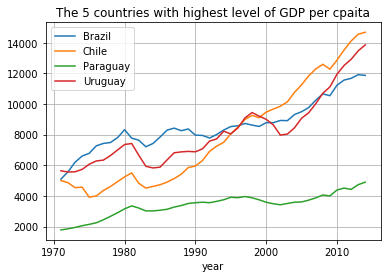

In [54]:
#Making a graph showing the 5 countries of South America that has the highest GDP growth.
top5_gdp = joiningdata_2[joiningdata_2["countries"].isin(['Chile', 'Paraguay', 'Columbia', 'Uruguay', 'Brazil'])]

def plot(fig):
    fig_gdp_change = fig.set_index('year')
    fig_gdp_change.groupby(['countries'])['gdp'].plot(legend=True, grid=True, title='The 5 countries with highest level of GDP per cpaita');

plot(top5_gdp)

The graph shows that Brazil, Chile and Uruguay have experienced somewhat similar growth rates in the years from 1971 to 2014. The growht rate in GDP of Paraguay is substantially lower. 

## Growth in energy use
### Energy use
We calculate the percentage change in energy use for each country by: 

$ growth_ {euse}= \frac{euse_{2014} - euse_{1971}}{euse_{1971}} \bullet 100 \%$

The procedure is the same as the one conducted for GDP growth above. 

In [19]:
# Creating a column containing the value of energy use for each country year 1971
joiningdata_3=joiningdata.copy()
joiningdata_grouped = joiningdata_3.groupby('countries')
joiningdata_grouped_first = joiningdata_grouped.euse.first()
joiningdata_grouped_first.name = 'first'

# The column is added to joiningdata_2.
joiningdata_3.set_index(['countries','year'],inplace=True)
joiningdata_3 = joiningdata_3.join(joiningdata_grouped_first)
joiningdata_3.reset_index(inplace=True)

# Creating a column containing the value of gdp for each country year 2014
joiningdata_grouped_last = joiningdata_grouped.euse.last()
joiningdata_grouped_last.name = 'last'

# The column is added to joiningdata_2.
joiningdata_3.set_index(['countries','year'],inplace=True)
joiningdata_3 = joiningdata_3.join(joiningdata_grouped_last)
joiningdata_3.reset_index(inplace=True)

# Calculating the economic growth for each country in the period 1971-2014
joiningdata_3['growth_euse'] = (joiningdata_3['last']-joiningdata_3['first'])/joiningdata_3['first']*100

In [20]:
#Table showing the total gdp growth rate for each country
joiningdata_mean=joiningdata_3.groupby('countries').mean().copy()
joiningdata_mean.drop(['year', 'euse', 'gdp', 'gdp_pct', 'first', 'last'],axis=1,inplace=True)
joiningdata_mean

# Sorting data:
joiningdata_mean.sort_values(by=['growth_euse'], inplace=True)
joiningdata_mean = joiningdata_mean.reset_index()

The table below shows GDP growth rate for each country:

In [21]:
joiningdata_mean

,countries,growth_euse
0,Peru,15.255741
1,Colombia,16.160964
2,Argentina,45.930612
3,Paraguay,46.119363
4,"Venezuela, RB",51.692850
5,Uruguay,60.720944
6,Brazil,107.961710
7,Chile,129.489047
8,Ecuador,149.092396
9,Bolivia,255.559299


As seen in the table the 5 countries with the highest growth of energy use is Bolivia, Ecuador, Chile, Brazil and Uruguay. These countries are represented in the graph below. 

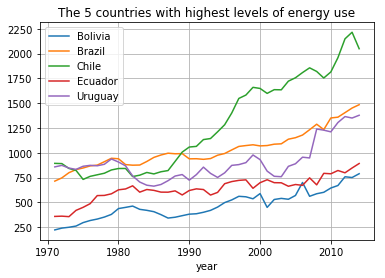

In [53]:
#Making a graph showing the 5 countries of South America that has the highest growth in energy use.
top5_euse = joiningdata_2[joiningdata_2["countries"].isin(['Bolivia', 'Ecuador', 'Chile', 'Brazil', 'Uruguay'])]

def plot(fig):
    fig_gdp_change = fig.set_index('year')
    fig_gdp_change.groupby(['countries'])['euse'].plot(legend=True, grid=True, title='The 5 countries with highest levels of energy use');

plot(top5_euse)

The graph shows that Chile is the country that has the highest growth rate of energy use. Chile is also the only country experiencing a negative growth in the last couple of years. Brazil and Uruguay seems to follow the same growth rate since the mid 00's as the same for Bolivia and Ecuador. 

We have constructed an interactive figure for the comparison of two countries. In the first dropdown you can choose whether you want to look at GDP og energy use and the next two dropdowns are for choosing countries. You can compare the two countries with the highest energy use og the two countries with the highest and the lowest energy use, respectively to see the difference. 

In [59]:
def plot_euse_gdp(df, variable, countries_A, countries_B): 
    
    if variable == 'Energy use':
        y = 'euse'
    else:
        y = 'gdp'
    
    I = df.countries == countries_A
    Y = df.countries == countries_B
    
    ax = df.loc[I,['year',y]].plot(x='year', y=y, style='-', grid=True)
    bx = df.loc[Y,['year',y]].plot(ax=ax,x='year', y=y, style='-', grid=True) 
    ax.legend([countries_A, countries_B])

In [60]:
widgets.interact(plot_euse_gdp, 
    
    df = widgets.fixed(joiningdata),
    variable = widgets.Dropdown(description='Variable', 
                               options=['Energy use','GDP']),
    countries_A = widgets.Dropdown(description='Country A', 
                                options=joiningdata.countries.unique()) ,           
    countries_B = widgets.Dropdown(description='Country B', 
                                options=joiningdata.countries.unique())
); 

interactive(children=(Dropdown(description='Variable', options=('Energy use', 'GDP'), value='Energy use'), Dro…

## Indice calculation

For further analysis we calculate the indices of energy use and gdp. We group the data by countries and calculate the indice by applying the lambda function. By setting the index to year we ensure that the first observation for each country is 1971. 

### Normalization of energy use and GDP per capita

In [29]:
data=joiningdata.copy()
#print(data)

#Indice calculation for euse
data.sort_values(by = ['countries', 'year'], inplace = True)
#data.reset_index(inplace = True)
#data.drop(['index'], axis = 1, inplace = True) #delete the old index

#Select the first element in a series
def first(x): 
    return x.iloc[0]

#Group the data and calcualte the index
grouped = data.groupby(['countries'])
for s in ['euse','gdp']:
    data['index_'+s] = grouped[s].transform(lambda x: x/first(x)*100)

#Set index to the figure (run only once!)
data.set_index('year')

#Check the dataset
print(data.head(10))

   countries    year         euse          gdp   gdp_pct  index_euse  \
0  Argentina  1971.0  1380.921398  7335.759136       NaN  100.000000   
1  Argentina  1972.0  1379.818923  7329.921158 -0.079582   99.920164   
2  Argentina  1973.0  1411.496781  7407.366754  1.056568  102.214129   
3  Argentina  1974.0  1415.682954  7685.857212  3.759642  102.517273   
4  Argentina  1975.0  1378.546993  7559.143749 -1.648658   99.828056   
5  Argentina  1976.0  1404.744778  7291.840429 -3.536159  101.725180   
6  Argentina  1977.0  1420.567765  7681.017571  5.337159  102.871008   
7  Argentina  1978.0  1426.919260  7227.564124 -5.903560  103.330954   
8  Argentina  1979.0  1484.565823  7849.363340  8.603164  107.505454   
9  Argentina  1980.0  1487.617079  7849.115971 -0.003151  107.726412   

    index_gdp  
0  100.000000  
1   99.920418  
2  100.976145  
3  104.772486  
4  103.045147  
5   99.401307  
6  104.706513  
7   98.525101  
8  107.001378  
9  106.998006  


The foloowing graph is interactive and you can se the development in the normalized energy use and gdp per capita for any South American coutnry.

In [51]:
def indice_graph(countries):
    graph_data = data.loc[data['countries'] == countries,:]
    graph_data.set_index('year').groupby('countries')['index_euse', 'index_gdp'].plot(legend=True, grid=True, title='Development in energy use and GDP per capita')
    return

# Next we create an interactive line chart which displays the development of employment shares grouped by the regions of Denmark
interact(indice_graph, countries=['Bolivia', 'Ecuador', 'Chile', 'Brazil', 'Uruguay', 'Peru', 'Paraguay', 'Venezuela, RB', 'Argentina', 'Colombia'])

interactive(children=(Dropdown(description='countries', options=('Bolivia', 'Ecuador', 'Chile', 'Brazil', 'Uru…

<function __main__.indice_graph(countries)>

What is interesteing about this figure is that in some countries like Argentina the development in energy use and GDP seem to follow. Whereas Uruguay for example have higher level of growth in GDP and Bolivia have higher level of growth in GDP.

# Conclusion

This was a quick ad hoc analysis of the relationship between energy consumption and economic growth. As we saw, the five countries that have the highest economic growth is not exactly the same countries that experienced the largest rise in energy consumption. However, some of the countries are the same and a further analysis could be conducted using appropriate econometric methods as more relevant variables.